<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week6/Day5/Mini_Project/Advanced_Statistical_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind, norm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


# 1. Data Loading and Exploration


In [141]:
df = pd.read_csv('AAPL, 1D 01012007-12072023.csv')
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,4159.0,3.662925e+08,3.724793e+08,2.422234e+07,1.067497e+08,2.136463e+08,4.965321e+08,3.373042e+09
vwap,4159.0,4.639138e+01,5.027756e+01,2.841000e+00,1.193620e+01,2.588520e+01,5.215415e+01,1.931020e+02
open,4159.0,4.636279e+01,5.023559e+01,2.835400e+00,1.195570e+01,2.577500e+01,5.226375e+01,1.937800e+02
close,4159.0,4.639606e+01,5.029348e+01,2.792900e+00,1.194715e+01,2.582500e+01,5.223125e+01,1.939700e+02
high,4159.0,4.688113e+01,5.084387e+01,2.928600e+00,1.202840e+01,2.626280e+01,5.262625e+01,1.944800e+02
low,4159.0,4.586579e+01,4.968010e+01,2.792900e+00,1.185360e+01,2.568000e+01,5.179625e+01,1.917600e+02
time,4159.0,1.428315e+09,1.505279e+08,1.167800e+09,1.297876e+09,1.428466e+09,1.558627e+09,1.689134e+09
transactions,4159.0,2.709318e+05,2.510859e+05,3.048700e+04,1.128150e+05,1.782460e+05,3.259555e+05,2.966979e+06


In [15]:
print(df.isnull().sum())
print("Duplicated rows",df.duplicated().sum())

volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64
Duplicated rows 0


In [142]:
df['time'] = pd.to_datetime(df['time'], unit='s')

df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df

,volume,vwap,open,close,high,low,time,transactions,year,month,day
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737,2007,1,3
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333,2007,1,4
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050,2007,1,5
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547,2007,1,8
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578,2007,1,9
...,...,...,...,...,...,...,...,...,...,...,...
4154,4.515552e+07,190.8214,189.8400,191.8100,192.0200,189.2000,2023-07-06 04:00:00,562755,2023,7,6
4155,4.675750e+07,191.4218,191.4100,190.6800,192.6700,190.2400,2023-07-07 04:00:00,538826,2023,7,7
4156,5.991216e+07,188.3628,189.2600,188.6100,189.9900,187.0350,2023-07-10 04:00:00,736912,2023,7,10
4157,4.663812e+07,187.8219,189.1600,188.0800,189.3000,186.6000,2023-07-11 04:00:00,577717,2023,7,11


#2. Data Visualization

In [69]:
fig = px.line(df, x='time', y='volume', title='Volume over time')

fig.update_layout(width=1400, height=600)
fig.show()

There was a high drop in the number of shares traded every year. The reason for this can be due to consolidation or stabilization in the stock price for  Apple since they released the first iPhone (June 2007). This leads to fewer shares being offered in the market.

In [73]:
fig = px.line(df, x='time', y='transactions', title='Transactions over the time')

fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Transactions')
fig.update_layout(width=1400, height=600)
fig.show()

Market volatility or price fluctuations may prompt traders to engage in more buying and selling activities, leading to a higher number of transactions even if the volume remains low. One of the reason why we found a peak during COVID years is because the pandemic forced millions of people to work and study remotely, the demand for personal electronic devices like smartphones, tablets, and laptops surged. Apple's diverse product line, including the iPhone, iPad, and MacBook, catered to this increased demand, leading to robust revenue growth.

In [76]:
fig = px.line(df, x='time', y='vwap', title='Volume Weighted Average Price during the years')

fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text = 'VWAP')
fig.update_layout(width=1200, height=600)
fig.show()

We can see that's there's a continuous growth in Apple's stocks over the year since the first iphone released in 2007.

In [88]:
df_candel = df[(df['year'] == 2020) & (df['month'] == 9)]
fig = go.Figure(data=[go.Candlestick(x=df_candel['time'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Stock price')

fig.update_layout(width=1200, height=600)
fig.show()

September 7 is missing dur to labor day in USA

#3. Statistical Analysis


In [95]:
key_columns = ['vwap','open', 'close', 'high', 'low','transactions', ]

print('Mean:\n', df[key_columns].mean())
print('\nMode:\n', df[key_columns].median(0))
print('\nStandar deviation:\n', df[key_columns].std())


Mean:
 vwap                46.391382
open                46.362788
close               46.396058
high                46.881127
low                 45.865790
transactions    270931.774465
dtype: float64

Mode:
 vwap                25.8852
open                25.7750
close               25.8250
high                26.2628
low                 25.6800
transactions    178246.0000
dtype: float64

Standar deviation:
 vwap                50.277557
open                50.235593
close               50.293482
high                50.843874
low                 49.680104
transactions    251085.854744
dtype: float64


In [ ]:
rolling_mean = df[key_columns].rolling(window=7).mean()
print("Rolling Mean:\n", rolling_mean)

# Example: Applying a window function
window_sum = df[key_columns].rolling(window=7).sum()
print("Window Sum:\n", window_sum)

In [108]:
fig = px.line(df, x='time', y=df['close'], title='Stock Close value over time')

fig.add_scatter(x=df['time'], y=rolling_mean['close'], mode='lines', name='Close Mean by week')

fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text = 'Close value')
fig.update_layout(width=1200, height=600)
fig.show()

It can be seen that for the month of January in 2022 the market behavied below the mean, but by the end of the month there was a high increased.

#4. Hypothesis Testing


In [144]:
df_grouped = df.groupby('year')

data_2017 = df_grouped.get_group(2017)['close']
data_2018 = df_grouped.get_group(2018)['close']
data_2019 = df_grouped.get_group(2019)['close']
data_2020 = df_grouped.get_group(2020)['close']
data_2021 = df_grouped.get_group(2021)['close']
data_2022 = df_grouped.get_group(2022)['close']
data_2023 = df_grouped.get_group(2023)['close']

results = stats.tukey_hsd(data_2017, data_2018, data_2019,data_2020,data_2021,data_2022,data_2023)
print(results)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -9.626     0.000   -13.095    -6.157
 (0 - 2)    -14.426     0.000   -17.892   -10.961
 (0 - 3)    -57.709     0.000   -61.171   -54.247
 (0 - 4)   -103.352     0.000  -106.817   -99.886
 (0 - 5)   -117.197     0.000  -120.666  -113.728
 (0 - 6)   -124.837     0.000  -129.026  -120.649
 (1 - 0)      9.626     0.000     6.157    13.095
 (1 - 2)     -4.801     0.001    -8.266    -1.335
 (1 - 3)    -48.083     0.000   -51.546   -44.621
 (1 - 4)    -93.726     0.000   -97.191   -90.260
 (1 - 5)   -107.572     0.000  -111.041  -104.103
 (1 - 6)   -115.212     0.000  -119.400  -111.023
 (2 - 0)     14.426     0.000    10.961    17.892
 (2 - 1)      4.801     0.001     1.335     8.266
 (2 - 3)    -43.283     0.000   -46.741   -39.824
 (2 - 4)    -88.925     0.000   -92.387   -85.463
 (2 - 5)   -102.771     0.000  -106.237   -99.306
 (2 - 6)   -110.411     0.000  -

#Hypothesis Testing

In [134]:
result17_18 = ttest_ind(data_2017, data_2018)
result18_19 = ttest_ind(data_2018, data_2019)
result19_20 = ttest_ind(data_2019, data_2020)
print(result17_18)
print(result18_19)
print(result19_20)

TtestResult(statistic=-24.15196563545234, pvalue=5.488982508551165e-86, df=500.0)
TtestResult(statistic=-7.569351918914971, pvalue=1.8150819713975408e-13, df=501.0)
TtestResult(statistic=-29.299518979994406, pvalue=7.808254624125693e-111, df=503.0)


The t-tests suggest significant differences in the mean close prices between consecutive years (2017-2018, 2018-2019, and 2019-2020). This implies that there are notable changes in the stock market trends or conditions over these periods, impacting the close prices of stocks.

In [ ]:
#Calculating the daily return
df['daily_return'] = ((df['close'] - df['close'].shift(1)) / df['close'].shift(1)) * 100

In [176]:
# copy the data
df_normalized = df.copy()

# apply normalization techniques
for column in df_normalized.columns:
	df_normalized['daily_return'] = (df_normalized['daily_return'] - df_normalized['daily_return'].min()) / (df_normalized['daily_return'].max() - df_normalized['daily_return'].min())

# view normalized data
print(df_normalized['daily_return'])


data_2017_nor = df_normalized[df_normalized['year']==2017]['daily_return']

0            NaN
1       0.632730
2       0.540633
3       0.578538
4       0.824058
          ...   
4154    0.578165
4155    0.544512
4156    0.528913
4157    0.554193
4158    0.595263
Name: daily_return, Length: 4159, dtype: float64


Text(0.5, 1.0, 'Gaussian Distribution for closing price 2017')

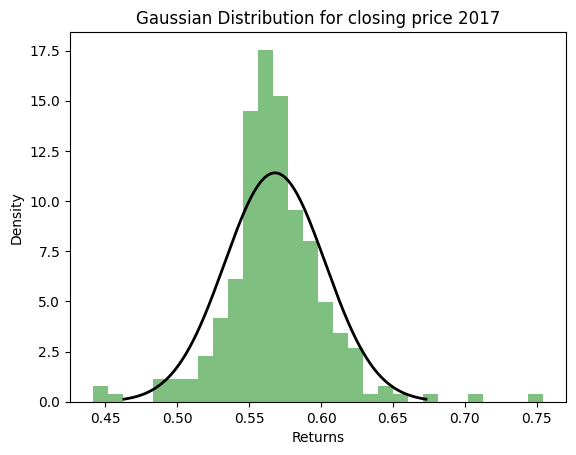

In [183]:
xmin=data_2017_nor.max()
xmax=data_2017_nor.min()
mu =data_2017_nor.mean()
sigma = data_2017_nor.std()
plt.hist(data_2017_nor, bins=30, density=True, alpha=0.5, color='g')
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Returns')
plt.ylabel('Density')
plt.title('Gaussian Distribution for closing price 2017')

In [178]:
data_2017 = df_grouped.get_group(2017)['daily_return']
data_2018 = df_grouped.get_group(2018)['daily_return']
data_2019 = df_grouped.get_group(2019)['daily_return']
data_2020 = df_grouped.get_group(2020)['daily_return']
data_2021 = df_grouped.get_group(2021)['daily_return']
data_2022 = df_grouped.get_group(2022)['daily_return']
data_2023 = df_grouped.get_group(2023)['daily_return']

Text(0.5, 1.0, 'Gaussian Distribution')

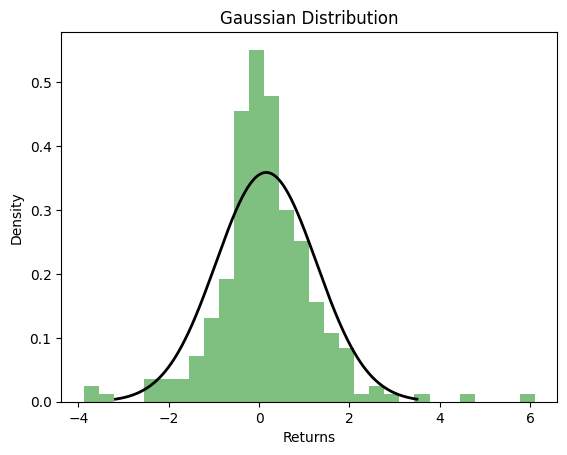

In [182]:
xmin=data_2017.max()
xmax=data_2017.min()
mu = np.mean(data_2017)
sigma = np.std(data_2017)
plt.hist(data_2017, bins=30, density=True, alpha=0.5, color='g', label='Data')
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Distribution')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.title('Gaussian Distribution')

We can see that for 2017 the values are not well distributed

#5. Summary and Insights
Based on the dataset provided, Apple demonstrated a remarkable and sustained upward trend in its stock prices over the years.

Notable peaks are observed across different years, each likely driven by various factors previously addressed. As the upward trajectory in prices persists, it becomes evident that this trend influences the distribution of stock returns. This is illustrated by the discernible differences observed in the T-distribution over time.
